# Task 7: Walmart Sales Forecasting

## 1. Importing Libraries

> This section imports the required Python libraries for data analysis, preprocessing, visualization, and modeling.

- NumPy, Pandas → data handling

- Matplotlib, Seaborn → visualization

- Scikit-learn → preprocessing, model training, evaluation

- XGBoost → advanced regression model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## 2. Loading the Dataset

> The Walmart Sales Forecast dataset from Kaggle is loaded using kagglehub.

- features.csv → additional features (holidays, fuel price, etc.)

- train.csv → weekly sales data

- stores.csv → store information

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "features.csv"
file_path2 = "train.csv"
file_path3 = "stores.csv"


# Load the latest version
features_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "aslanahmedov/walmart-sales-forecast",
  file_path,
)

train_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "aslanahmedov/walmart-sales-forecast",
  file_path2,
)

stores_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "aslanahmedov/walmart-sales-forecast",
  file_path3,
)


/tmp/ipython-input-1573284000.py:13: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  features_df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'walmart-sales-forecast' dataset.


/tmp/ipython-input-1573284000.py:23: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  train_df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'walmart-sales-forecast' dataset.


/tmp/ipython-input-1573284000.py:33: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  stores_df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'walmart-sales-forecast' dataset.


## 3. Data Cleaning and Preprocessing

- Removed unused Markdown columns.

- Dropped records with zero or negative sales.

- Extracted year, month, day from date.

- Converted categorical variables (IsHoliday, Type) into numerical format using Label Encoding.

In [ ]:
df = train_df.merge(features_df, how='left').merge(stores_df, how='left')
print(df.shape)
df.head()

(421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [ ]:
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


In [ ]:
df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],inplace=True,axis=1)

In [ ]:
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0
Type,0


In [ ]:
df[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,182.318780,8.743,B,118221


In [ ]:
df= df.drop(df[df['Weekly_Sales']<=0].index)

In [ ]:
df.shape

(420212, 11)

In [ ]:
df["year"] = pd.DatetimeIndex(df["Date"]).year
df["month"] = pd.DatetimeIndex(df["Date"]).month
df["day"] = pd.DatetimeIndex(df["Date"]).day
df.drop(['Date'],inplace=True,axis=1)
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,day
0,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
1,1,1,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,2,12
2,1,1,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,2,19
3,1,1,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,2,26
4,1,1,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,3,5


In [ ]:
le = LabelEncoder()

df['IsHoliday'] = le.fit_transform(df['IsHoliday'])
df['Type'] = le.fit_transform(df['Type'])
df

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,day
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,5
1,1,1,46039.49,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,12
2,1,1,41595.55,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,19
3,1,1,19403.54,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,26
4,1,1,21827.90,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,28
421566,45,98,628.10,0,64.89,3.985,192.170412,8.667,1,118221,2012,10,5
421567,45,98,1061.02,0,54.47,4.000,192.327265,8.667,1,118221,2012,10,12
421568,45,98,760.01,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,19


## 4. Feature and Target Selection

- Features (X): all columns except Weekly_Sales

- Target (y): Weekly_Sales

In [ ]:
X = df.drop(['Weekly_Sales'],axis=1)
y = df['Weekly_Sales']
#

## 5. Baseline Model – Linear Regression

> A simple Linear Regression model was trained to establish baseline performance.

### 5.1 Data Splitting

- Training Set: 80%

- Testing Set: 20%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 5.2 Model Training and Prediction

> Fitted linear regression model.

> Predicted test set sales.

In [ ]:
from sklearn.linear_model import LinearRegression
rf = LinearRegression()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)



### 5.3 Model Evaluation

> Metrics: MSE, MAE, R² Score

> Visualization: Actual vs Predicted Weekly Sales

In [ ]:
print("mean square error = ", mean_squared_error(y_test, y_pred))
print("mean absolute error = ", mean_absolute_error(y_test, y_pred))
print("r2 score = ", r2_score(y_test, y_pred))

mean square error =  464612749.3807033
mean absolute error =  14523.007069722005
r2 score =  0.09043139837788738


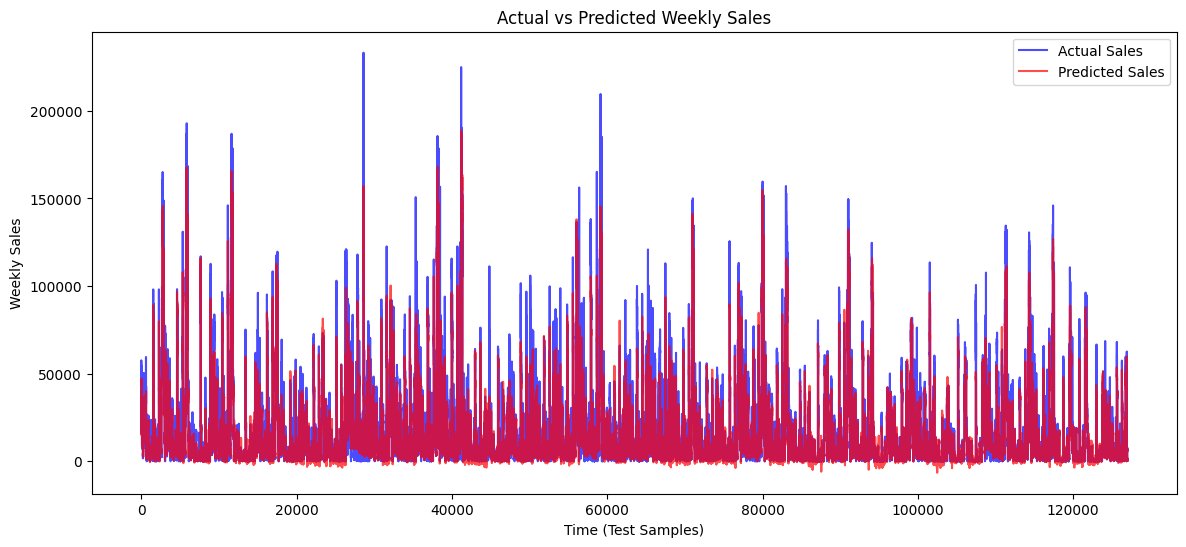

In [ ]:
# Make sure indices align
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred)

plt.figure(figsize=(14,6))
plt.plot(y_test, label="Actual Sales", color="blue", alpha=0.7)
plt.plot(y_pred, label="Predicted Sales", color="red", alpha=0.7)
plt.title("Actual vs Predicted Weekly Sales")
plt.xlabel("Time (Test Samples)")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


## 6. Advanced Model – XGBoost Regressor

> An XGBoost model was applied to improve prediction accuracy.



In [ ]:
# aplying XGBRegressor
train = df[df['year']< 2012]
test = df[df['year'] >= 2012]

### 6.1 Time-Aware Split

> Training Data: years before 2012

> Testing Data: year 2012 and beyond

In [ ]:
X_train = train.drop(['Weekly_Sales'],axis=1)
y_train = train['Weekly_Sales']
X_test = test.drop(['Weekly_Sales'],axis=1)
y_test = test['Weekly_Sales']
#

### 6.2 Model Training and Prediction

> Tuned hyperparameters (n_estimators=500, max_depth=8, etc.).

> Trained on training set, predicted on test set.

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


### 6.3 Model Evaluation and Feature Importance

> Metrics: MSE, MAE, R² Score

- Plotted Feature Importance

- Compared actual vs predicted weekly sales.

In [ ]:
print("mean square error = ", mean_squared_error(y_test, y_pred))
print("mean absolute error = ", mean_absolute_error(y_test, y_pred))
print("r2 score = ", r2_score(y_test, y_pred))

mean square error =  22122995.933648907
mean absolute error =  2703.321118104756
r2 score =  0.9548628845936757


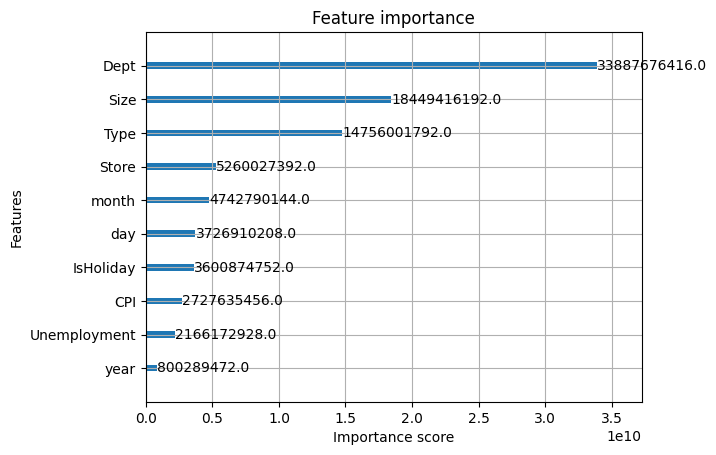

In [ ]:
import xgboost as xgb
xgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.show()


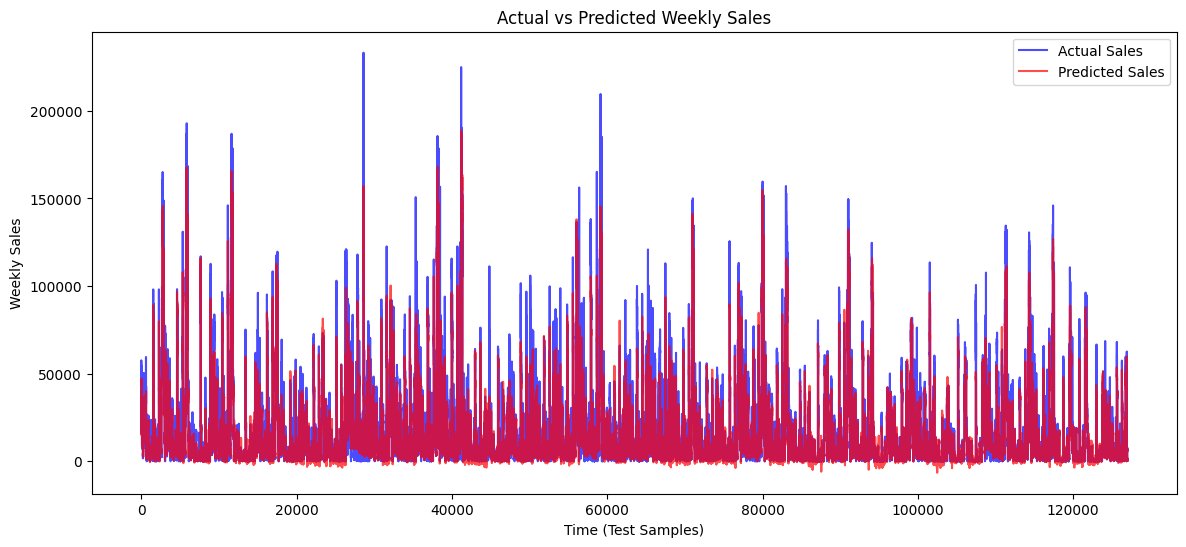

In [ ]:
# Make sure indices align
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred)

plt.figure(figsize=(14,6))
plt.plot(y_test, label="Actual Sales", color="blue", alpha=0.7)
plt.plot(y_pred, label="Predicted Sales", color="red", alpha=0.7)
plt.title("Actual vs Predicted Weekly Sales")
plt.xlabel("Time (Test Samples)")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


## 7. Results and Comparison
### 7.1 Linear Regression Performance

> Mean Square Error: 464,612,749

>Mean Absolute Error: 14,523

> R² Score: 0.09 (poor fit)

### 7.2 XGBoost Performance

> Mean Square Error: 22,122,995

> Mean Absolute Error: 2,703

> R² Score: 0.95 (excellent fit)

## 8. Conclusion

> The baseline Linear Regression model was unable to capture complex trends in the data.

> The XGBoost model provided a significant improvement, achieving a high R² score (~95%).

> Additional improvements can be made by including lag features, rolling averages, and seasonal decomposition for capturing time-series patterns.